In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "E:/Work_Data/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [8]:
# 80% ==> training
# 20% ==> 10% val,10% test

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [22]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [35]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [28]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [53]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (32, 30, 30, 64)         

In [57]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [59]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,
    verbose=1,
    epochs=50,)

Epoch 1/50
54/54 [==============================] - 175s 3s/step - loss: 0.9094 - accuracy: 0.4913 - val_loss: 0.8992 - val_accuracy: 0.4479
Epoch 2/50
54/54 [==============================] - 155s 3s/step - loss: 0.8041 - accuracy: 0.6215 - val_loss: 0.6262 - val_accuracy: 0.7344
Epoch 3/50
54/54 [==============================] - 157s 3s/step - loss: 0.5035 - accuracy: 0.7963 - val_loss: 0.4389 - val_accuracy: 0.8125
Epoch 4/50
54/54 [==============================] - 155s 3s/step - loss: 0.3351 - accuracy: 0.8681 - val_loss: 0.2642 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 155s 3s/step - loss: 0.2285 - accuracy: 0.9051 - val_loss: 0.1588 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 153s 3s/step - loss: 0.1953 - accuracy: 0.9225 - val_loss: 0.1566 - val_accuracy: 0.9271
Epoch 7/50
54/54 [==============================] - 155s 3s/step - loss: 0.1615 - accuracy: 0.9363 - val_loss: 0.1858 - val_accuracy: 0.9427
Epoch 8/50
54

In [61]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 8s 974ms/step - loss: 0.0964 - accuracy: 0.9883


In [62]:
scores

[0.09644679725170135, 0.98828125]

In [63]:
history

In [64]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

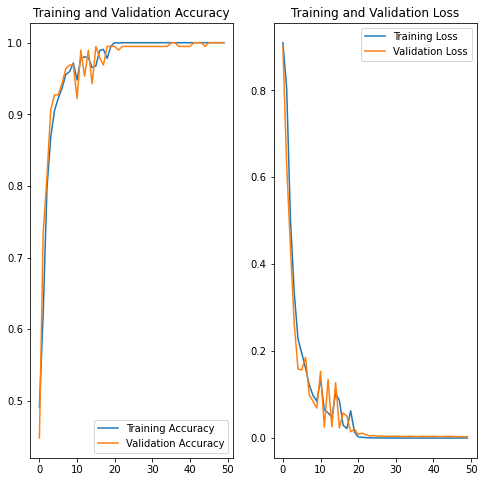

In [68]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [78]:
import numpy as np

1st Image to predict
Actaual_Image: Potato___Early_blight
Predicted Image is : Potato___Early_blight


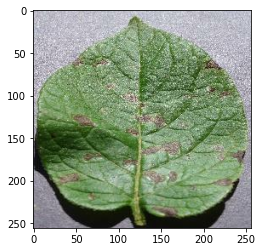

In [98]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print('1st Image to predict')
    plt.imshow(first_image)
    
    print('Actaual_Image:',class_names[first_label])
    
    batch_images=model.predict(images_batch)
    print("Predicted Image is :",class_names[np.argmax(batch_images[1])])

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


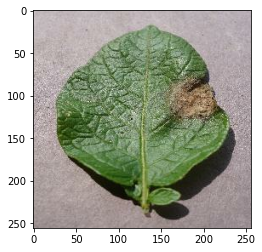

In [105]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[2].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[2])])

In [107]:
model.save("E:/Work_Data/PlantVillage")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: E:/Work_Data/PlantVillage\assets
